In [11]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

style.use('ggplot')

In [12]:
df= pd.read_csv("bfi.csv")
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)

In [13]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577234804, 0.0)

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468382

In [16]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.134311
1,2.751887
2,2.142702
3,1.852328
4,1.548163
5,1.073582
6,0.839539
7,0.799206
8,0.718989
9,0.688089


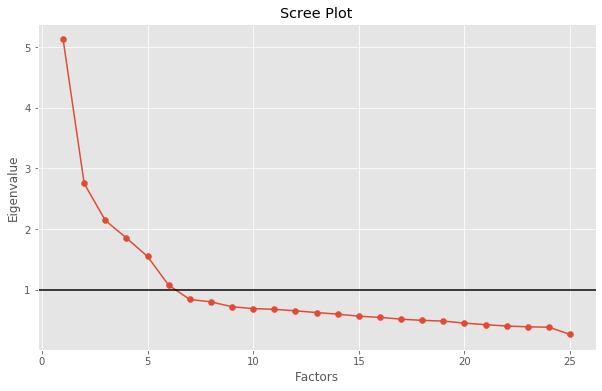

In [17]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev.values)
plt.plot(range(1,df.shape[1]+1),ev.values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")

In [19]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.040783,0.095220,0.048734,-0.113057,-0.530987,0.161216
A2,0.235538,0.033131,0.133714,0.063734,0.661141,-0.006244
A3,0.343008,-0.009621,0.121353,0.033990,0.605933,0.160106
A4,0.219717,-0.081518,0.235140,-0.125338,0.404594,0.086356
A5,0.414458,-0.149616,0.106382,0.030977,0.469698,0.236519
C1,0.077248,-0.004358,0.554582,0.190124,0.007511,0.095035
C2,0.038370,0.068330,0.674545,0.087593,0.057055,0.152775
C3,0.031867,-0.039994,0.551164,-0.011338,0.101282,0.008996
C4,-0.066241,0.216283,-0.638475,-0.143846,-0.102617,0.318359
C5,-0.180812,0.284187,-0.544838,0.025837,-0.059955,0.132423


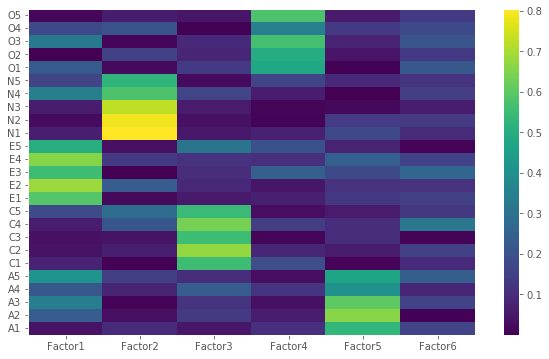

In [20]:
import numpy as np
Z=np.abs(fa.loadings)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(fa.loadings.index.values)
ax.set_xticklabels(fa.loadings.columns.values)
plt.show()

In [21]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.040465,0.111126,0.022798,-0.077931,-0.428166
A2,0.213716,0.029588,0.139037,0.062139,0.626946
A3,0.317848,0.009357,0.109331,0.056196,0.650743
A4,0.204566,-0.066476,0.230584,-0.112700,0.435624
A5,0.393034,-0.122113,0.087869,0.066708,0.537087
C1,0.070184,0.010416,0.545824,0.209584,0.038878
C2,0.033270,0.089574,0.648731,0.115434,0.102782
C3,0.023907,-0.030855,0.557036,-0.005183,0.111578
C4,-0.064984,0.240410,-0.633806,-0.107535,-0.037498
C5,-0.176395,0.290318,-0.562467,0.036822,-0.047525


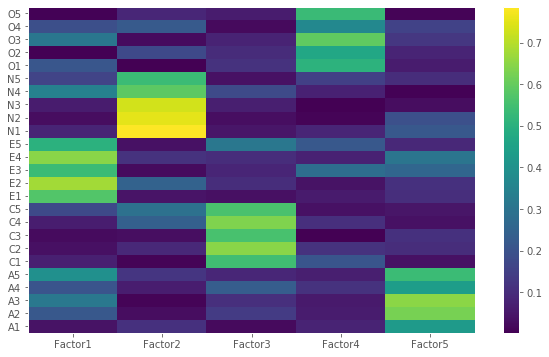

In [22]:
Z=np.abs(fa.loadings)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(fa.loadings.index.values)
ax.set_xticklabels(fa.loadings.columns.values)
plt.show()

In [23]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.473090,2.709633,2.041106,1.522153,1.844498
Proportion Var,0.098924,0.108385,0.081644,0.060886,0.073780
Cumulative Var,0.098924,0.207309,0.288953,0.349839,0.423619
